In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing all required libraries
import numpy as np
import pandas as pd
import sklearn as sk
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
#Loading the dataset
dataset=pd.read_csv('Iranian Churn.csv')
dataset

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                          17          3            1       1   30   
1                           4          2            1       2   25   
2                          24          3            1       1   30   
3                          35          1            1       1   15   
4                          33          1            1       1   15   
...                       ...        ...          ...     ...  ...   
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn  
0            197.640      0  
1             46.035      0  
2           1536.520      0  
3            240.020      0  
4            145.805      0  
...              ...    ...  
3145         721.980      0  
3146         261.210      0  
3147         280.320      0  
3148        1077.640      0  
3149         100.680      1  

[3150 rows x 14 columns]

In [97]:
# retrieving the dimensions of the dataset
dataset.shape

(3150, 14)

In [98]:
dataset.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [99]:
dataset.tail()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn  
3145          721.98      0  
3146          261.21      0  
3147          280.32      0  
3148         1077.64      0  
3149          100.68      1

In [100]:
#printing a concise summary of the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [101]:
#returning a statistical description of the data in the DataFrame
dataset.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

In [102]:
#returning a statistical description of the data in all columns of the DataFrame
dataset.describe(include='all')

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

In [103]:
#inspecting the presence of null values
dataset.iloc[:,:].isnull().values.any()

False

#series of scatterplots for each pair of variables and a histogram for each variable
sns.pairplot(dataset.iloc[:,1:13])

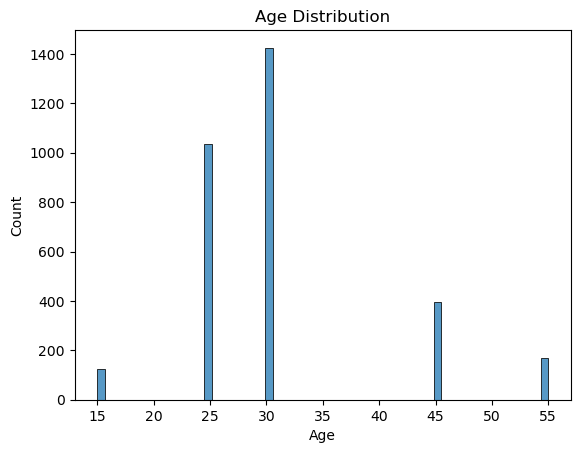

In [104]:
#plotting the distribution of column Age
sns.histplot(dataset.Age)
plt.title('Age Distribution')
plt.show()

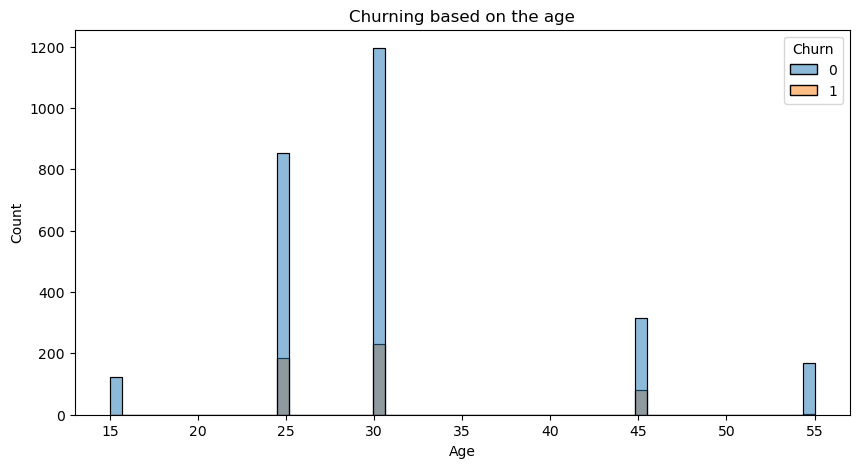

In [105]:
#explore the age distribution of the people 
#who have responded to the social media ads and bought the product and those who haven’t.
plt.figure(figsize=(10,5))
plt.title("Churning based on the age")
sns.histplot(x='Age',hue='Churn',data=dataset)
plt.show()

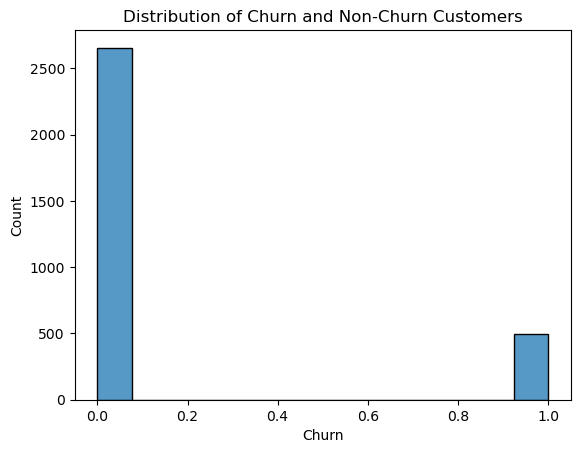

In [106]:
#plotting the distribution of column Clas
sns.histplot(dataset['Churn'])
plt.title('Distribution of Churn and Non-Churn Customers')
plt.show()

In [107]:
dataset['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

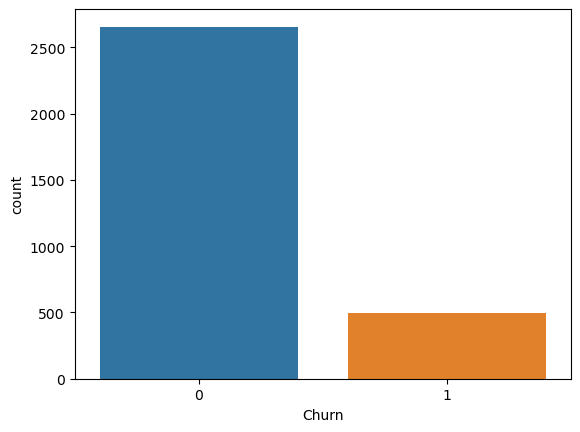

In [108]:
sns.countplot(dataset,x='Churn')


<Axes: xlabel='Churn', ylabel='Call  Failure'>

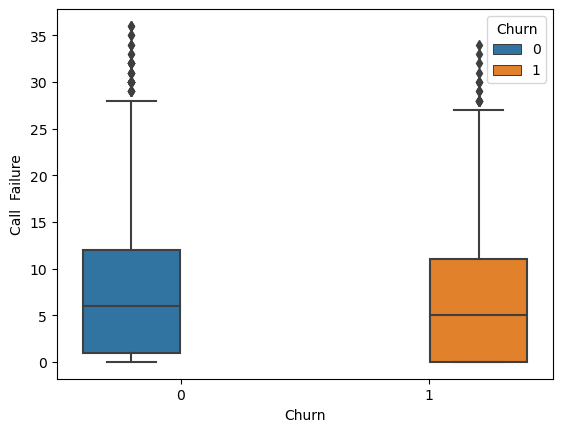

In [109]:
sns.boxplot(x = 'Churn', y = 'Call  Failure', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Seconds of Use'>

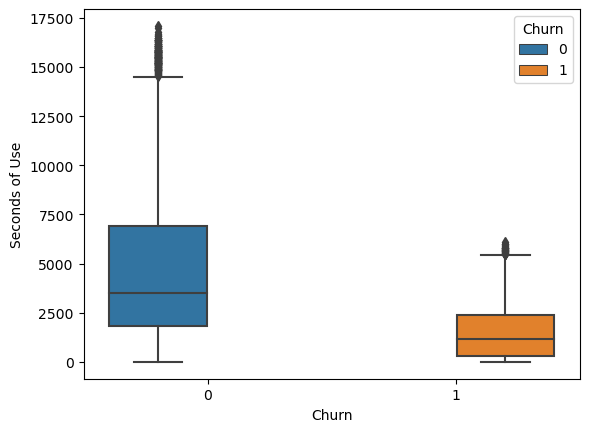

In [110]:
sns.boxplot(x = 'Churn', y = 'Seconds of Use', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Subscription  Length'>

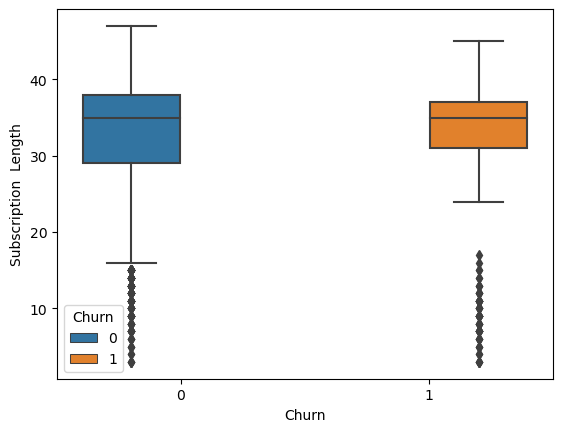

In [111]:
sns.boxplot(x = 'Churn', y = 'Subscription  Length', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Frequency of use'>

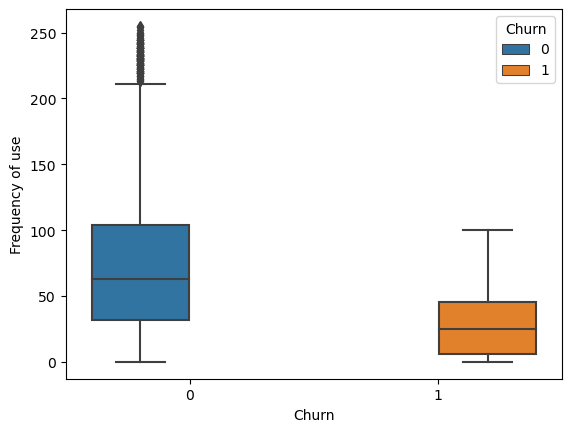

In [112]:
sns.boxplot(x = 'Churn', y = 'Frequency of use', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Frequency of SMS'>

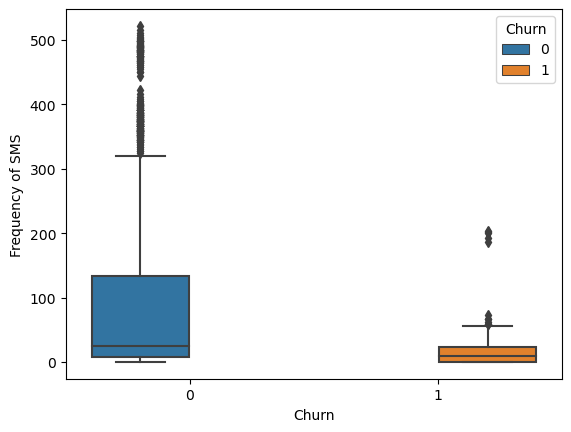

In [113]:
sns.boxplot(x = 'Churn', y = 'Frequency of SMS', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Distinct Called Numbers'>

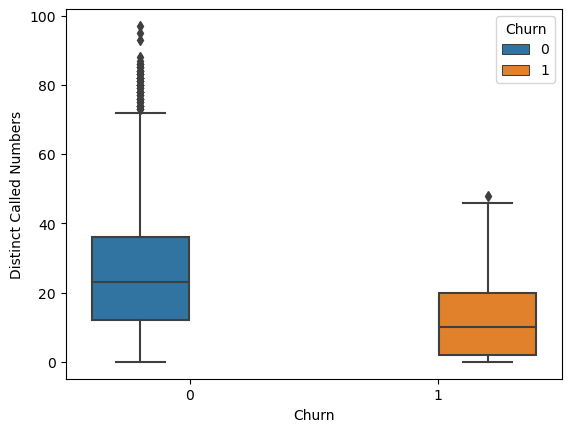

In [114]:
sns.boxplot(x = 'Churn', y = 'Distinct Called Numbers', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Age'>

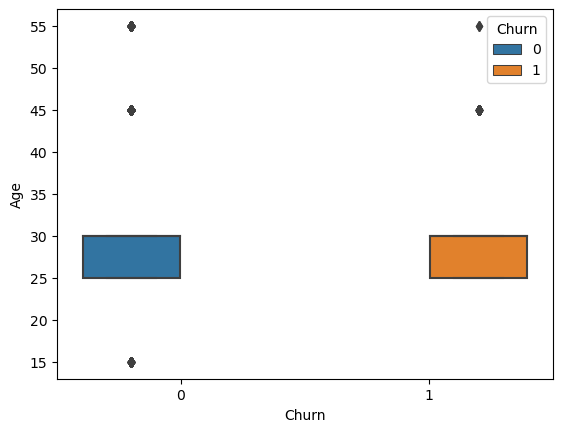

In [115]:
sns.boxplot(x = 'Churn', y = 'Age', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Customer Value'>

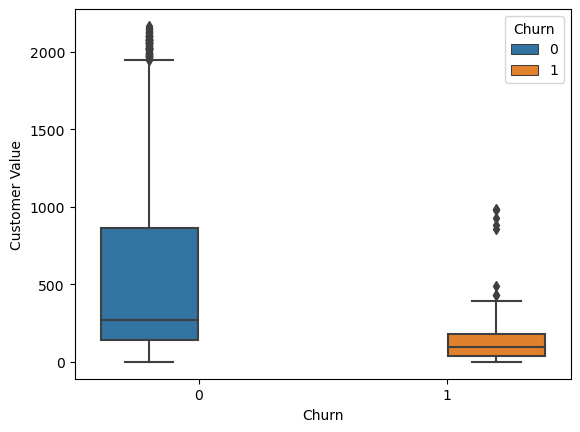

In [116]:
sns.boxplot(x = 'Churn', y = 'Customer Value', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Charge  Amount'>

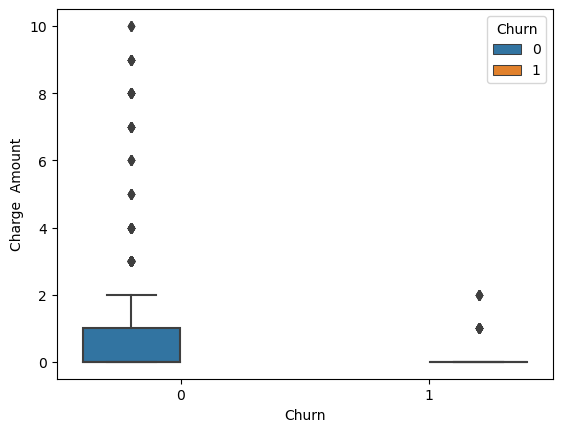

In [146]:
sns.boxplot(x = 'Churn', y = 'Charge  Amount', data = dataset, hue = 'Churn')

In [117]:
# Select the numerical columns where you want to remove outliers
numerical_columns = ['Call  Failure','Subscription  Length','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Customer Value']  # Replace with your actual column names

# Calculate the IQR for each numerical column
Q1 = dataset[numerical_columns].quantile(0.25)
Q3 = dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = ((dataset[numerical_columns] < lower_bound) | (dataset[numerical_columns] > upper_bound)).any(axis=1)
dataset= dataset[~outliers]

# Now 'cleaned_df' contains your dataset with outliers removed


<Axes: xlabel='Churn', ylabel='Customer Value'>

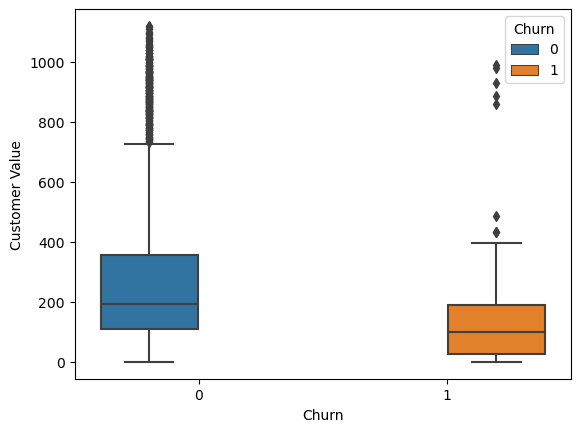

In [118]:
sns.boxplot(x = 'Churn', y = 'Customer Value', data = dataset, hue = 'Churn')

<Axes: xlabel='Churn', ylabel='Distinct Called Numbers'>

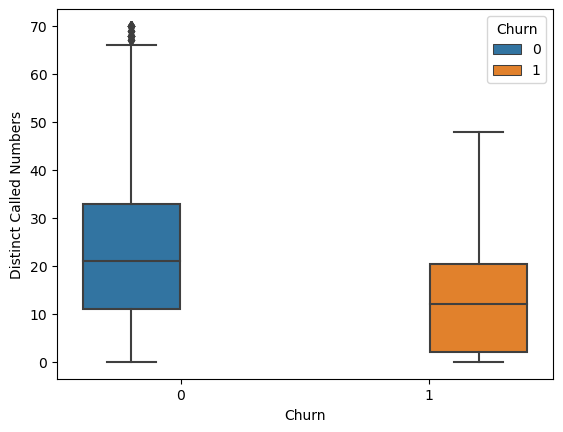

In [119]:
sns.boxplot(x = 'Churn', y = 'Distinct Called Numbers', data = dataset, hue = 'Churn')

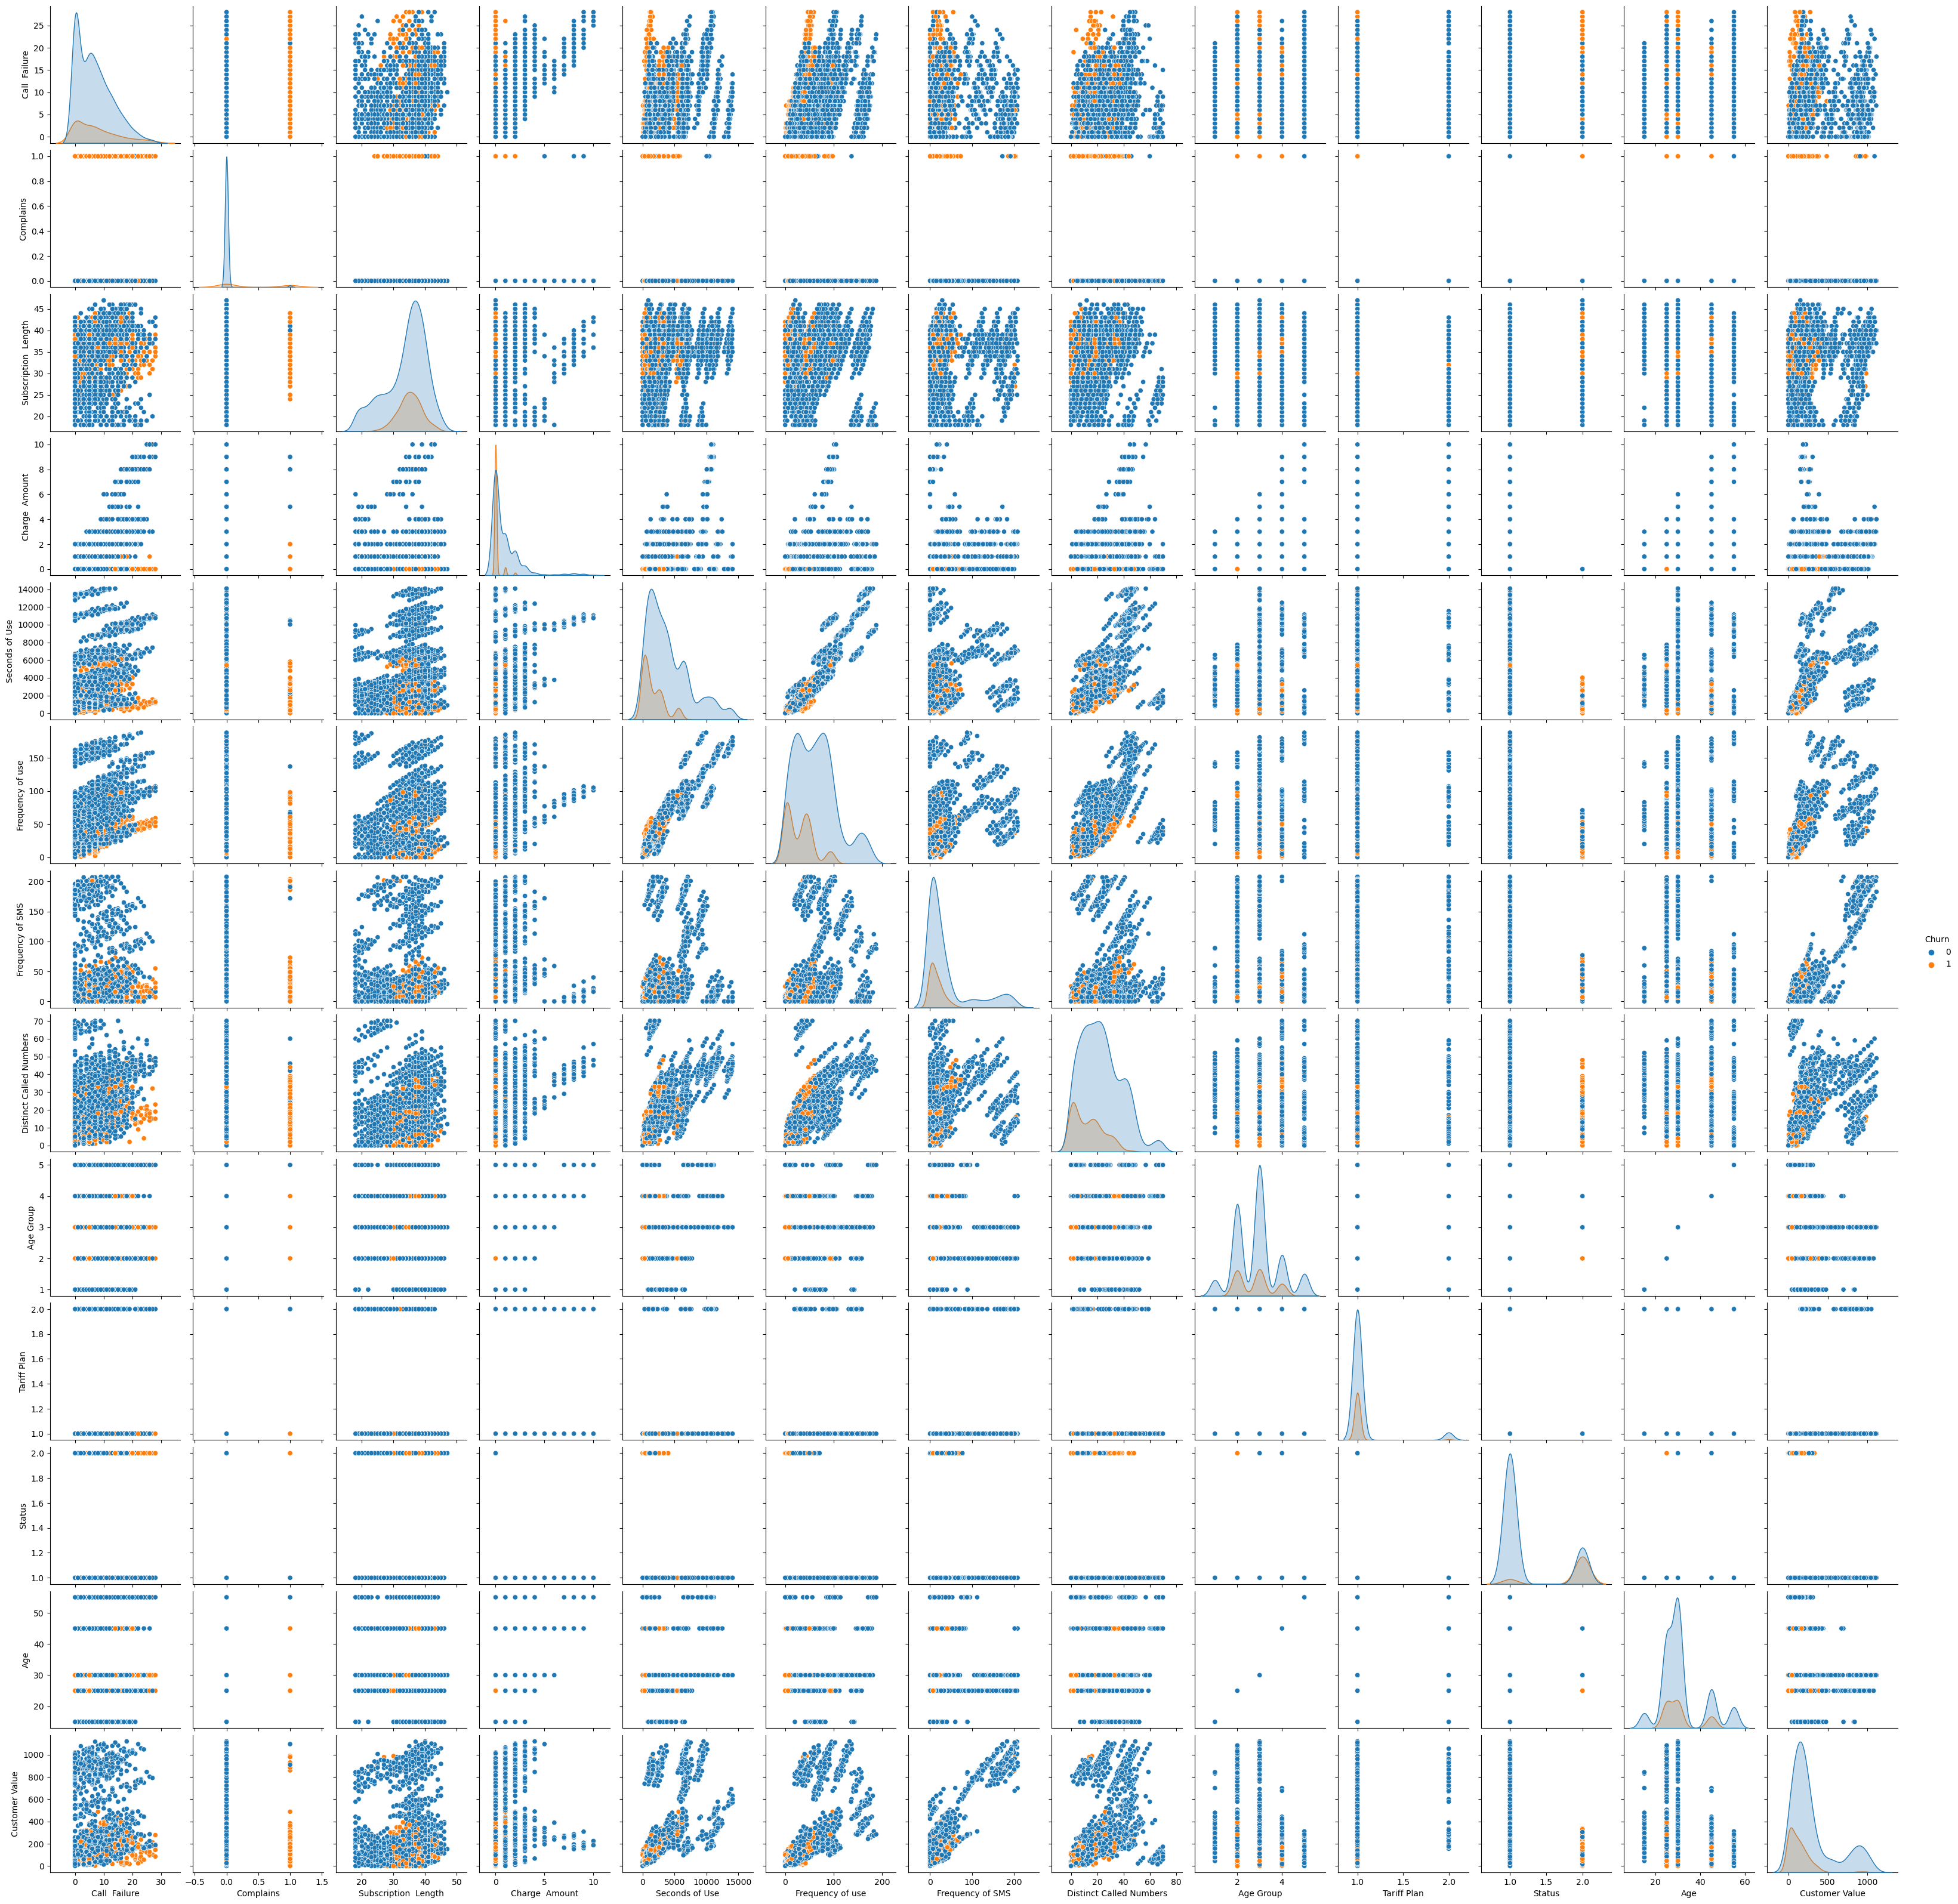

In [27]:
#scatter plots of the independent variables in the dataset
#plt.figure(figsize=(10,5))
#plt.title("Scatter plots of the independent variables")
#sns.histplot(x=['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value'],hue='class',data=dataset)
#plt.show()

sns.pairplot(dataset, hue = 'Churn',vars=['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Frequency of use','Frequency of SMS','Distinct Called Numbers','Age Group','Tariff Plan','Status','Age','Customer Value'])
plt.show()

In [120]:
# Classification using Random Forest algorithm

# (a) Determining the class feature and input features:

#In this dataset, 'class' column is the class label or dependent variable,
#other columns  are independent variables or input features.
#first step, slicing data into input and output
X = dataset.drop(columns=['Churn']).values
y = dataset['Churn'].values

In [121]:
X

array([[  8.   ,   0.   ,  38.   , ...,   1.   ,  30.   , 197.64 ],
       [  0.   ,   0.   ,  39.   , ...,   2.   ,  25.   ,  46.035],
       [ 10.   ,   0.   ,  38.   , ...,   1.   ,  15.   , 240.02 ],
       ...,
       [  7.   ,   0.   ,  20.   , ...,   1.   ,  30.   , 221.28 ],
       [ 21.   ,   0.   ,  19.   , ...,   1.   ,  25.   , 721.98 ],
       [ 13.   ,   0.   ,  18.   , ...,   1.   ,  30.   , 280.32 ]])

In [122]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
# (b) Splitting the dataset into the Training set and the Test set:

#data splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [124]:
#instantiating the selector and setting the variance threshold
from sklearn.feature_selection import VarianceThreshold 
variance_selector = VarianceThreshold(threshold=0)

In [125]:
#identifying the features below the variance threshold and transforming training array to remove them
X_train_fs = variance_selector.fit_transform(X_train)

In [126]:
#similarly transforming the test dataset
X_test_fs = variance_selector.transform(X_test)

In [127]:
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 13 features remain


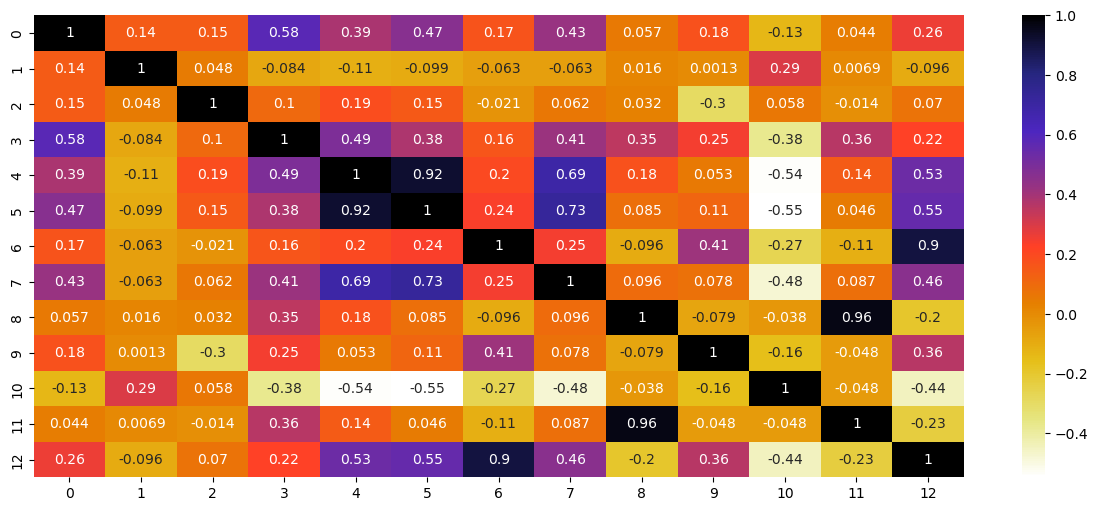

In [128]:
#Pearson correlation
plt.figure( figsize=(15, 6))
#cor=X_train_fs.corr()
cor = np.corrcoef(X_train_fs, rowvar=False)
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [129]:
import numpy as np

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the indices of correlated columns
    corr_matrix = np.corrcoef(dataset, rowvar=False)
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix[i, j]) > threshold: # we are interested in absolute coeff value
                col_corr.add(i)
                col_corr.add(j)
    return col_corr

In [130]:
corr_features = correlation(X_train_fs, 0.7)
len(set(corr_features))

7

In [131]:
corr_features

{4, 5, 6, 7, 8, 11, 12}

In [132]:
X_train_fs=np.delete(X_train_fs, list(corr_features), axis=1)
X_test_fs=np.delete(X_test_fs, list(corr_features), axis=1)
X_train_fs

array([[15.,  0., 41.,  2.,  1.,  1.],
       [ 7.,  0., 40.,  1.,  1.,  1.],
       [ 7.,  0., 40.,  0.,  1.,  2.],
       ...,
       [ 5.,  0., 38.,  0.,  1.,  1.],
       [ 6.,  0., 43.,  0.,  1.,  2.],
       [ 6.,  1., 27.,  1.,  2.,  1.]])

In [133]:
# Using the SelectKBest selector from sklearn to select the k features with the best scores on a selected test statistic
from sklearn.feature_selection import SelectKBest, f_classif 
selector = SelectKBest(f_classif, k=4)
X_train_fs = selector.fit_transform(X_train_fs, y_train) 
X_test_fs = selector.transform(X_test_fs)
X_train_fs

array([[0., 2., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 2.],
       ...,
       [0., 0., 1., 1.],
       [0., 0., 1., 2.],
       [1., 1., 2., 1.]])

# Creaing boolean array for all features
new_features_indices =variance_selector.get_support(indices=True)[selector.get_support()]
new_features_boolean = np.isin(np.arange(13), new_features_indices)
new_features_boolean

<Axes: ylabel='count'>

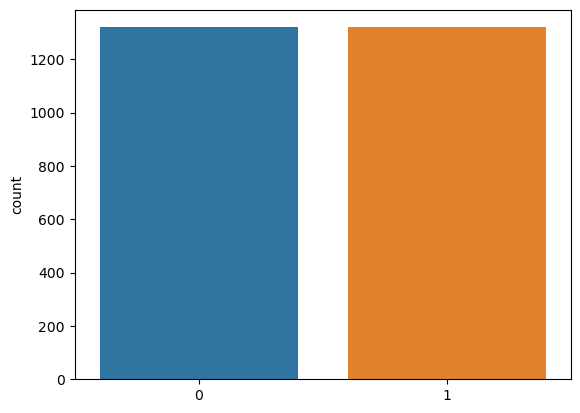

In [134]:
#class imbalance correction using SMOTE
from imblearn.over_sampling import SMOTE
resampler=SMOTE(random_state=0)
X_train_fs_smote,y_train_smote=resampler.fit_resample(X_train_fs,y_train)
sns.countplot(x=y_train_smote)

In [135]:
#importing from Scikit Learn
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.feature_selection import RFECV

In [136]:
# (c) Scaling features:
# Standardising data before passing to model
scaler = StandardScaler()
X_train_fs_smote = scaler.fit_transform(X_train_fs_smote) 
X_test_fs = scaler.transform(X_test_fs)
X_train_fs_smote

array([[-0.48140028,  1.18359367, -0.18310677, -1.07148863],
       [-0.48140028,  0.38147421, -0.18310677, -1.07148863],
       [-0.48140028, -0.42064525, -0.18310677,  0.93328102],
       ...,
       [-0.48140028, -0.42064525, -0.18310677,  0.93328102],
       [-0.48140028, -0.42064525, -0.18310677, -1.07148863],
       [ 2.07970823, -0.42064525, -0.18310677,  0.93328102]])

In [137]:
#transforming the training dataset and test dataset
# Use RandomForestClassifier as the base model
rf = RandomForestClassifier(random_state=0) 
rfecv = RFECV(rf, cv=5, step=1)
X_train_fs_smote = rfecv.fit_transform(X_train_fs_smote,y_train_smote) 
X_test_fs = rfecv.transform(X_test_fs)
print(f"Number of remaining features: {X_train_fs_smote.shape[1]}")
X_train_fs_smote

Number of remaining features: 3


array([[-0.48140028,  1.18359367, -1.07148863],
       [-0.48140028,  0.38147421, -1.07148863],
       [-0.48140028, -0.42064525,  0.93328102],
       ...,
       [-0.48140028, -0.42064525,  0.93328102],
       [-0.48140028, -0.42064525, -1.07148863],
       [ 2.07970823, -0.42064525,  0.93328102]])

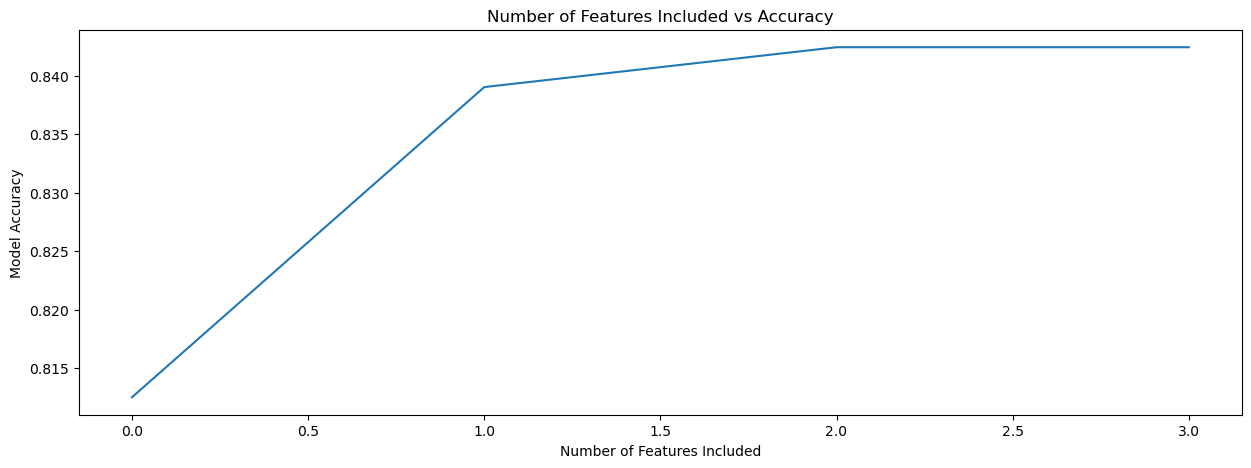

In [138]:
#plotting the model accuracy against the number of features
plt.figure( figsize=(15, 5))
plt.title('Number of Features Included vs Accuracy') 
plt.xlabel('Number of Features Included') 
plt.ylabel('Model Accuracy')
#plt.plot(np.linspace(0,8,1), rfecv.cv_results_['mean_test_score']) 
plt.plot(rfecv.cv_results_['mean_test_score']) 
plt.show()

In [139]:
#instantiating a new RandomForestClassifier model, and then fitting it to the data with the selected features
rf_selectedfeatures = RandomForestClassifier() 
rf_selectedfeatures.fit(X_train_fs_smote, y_train_smote)

RandomForestClassifier()

Accuracy Score: 81.82%


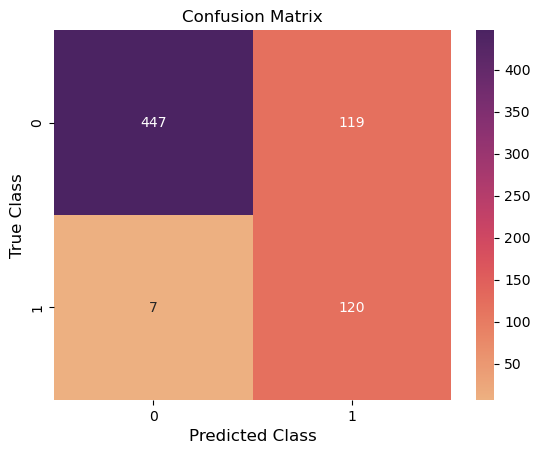


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       566
           1       0.50      0.94      0.66       127

    accuracy                           0.82       693
   macro avg       0.74      0.87      0.77       693
weighted avg       0.90      0.82      0.84       693



In [140]:
          
#making predictions on the test dataset
y_pred = rf_selectedfeatures.predict(X_test_fs)

#evaluating using accuracy_score and confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%") 
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12)
plt.show()

from sklearn import metrics
result=metrics.classification_report(y_test,y_pred)
print('\nClassification Report:\n')
print(result)

AUC Score: 0.91


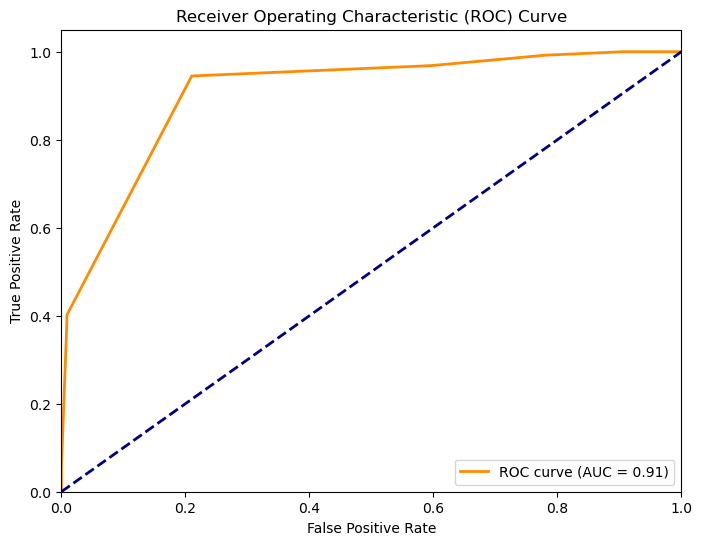

In [141]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Calculate the predicted probabilities for the positive class
y_pred_proba = rf_selectedfeatures.predict_proba(X_test_fs)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
